<a href="https://colab.research.google.com/github/Lucianorosa71/DS_2022_2023/blob/main/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction

Dimensionality reduction is the process in which we minimize the amount of data, discarding unnecessary *features* but preserving as much information as possible.

**Example with only 1 target variable and 1 independent variable**

In [ ]:
# importar as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

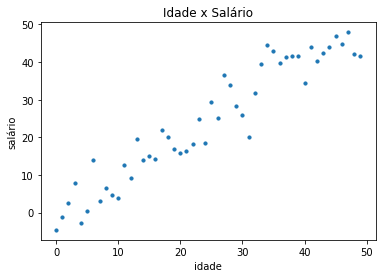

In [ ]:
# exemplo com apenas 1 variável independente
x = np.arange(50)
y = np.random.normal(x, 5)

plt.scatter(x, y, s=10)
plt.title("Idade x Salário")
plt.xlabel("idade")
plt.ylabel("salário")
plt.show()

**What if I have 100 independent variables?**

* Computational complexity.
* Unfeasible visualization.
* There are probably unnecessary variables.
* Very complex model.

## Dimensionality reduction techniques

1. Feature Selection
    * missing values 
    * low variance
    * High correlation
    * Backward feature elimination
    * Forward feature selection
2. Features extraction
    * Factor Analysis
    * Principal Component Analysis

### Proportion of missing values

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv")

df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,...,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,...,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,...,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,...,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,...,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,...,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


In [ ]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False).head(10)

furto_bicicleta               0.802326
roubo_bicicleta               0.802326
cmba                          0.523256
posse_drogas                  0.523256
trafico_drogas                0.523256
apreensao_drogas_sem_autor    0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
furto_celular                 0.418605
dtype: float64

In [ ]:
df_clean = df.drop(['roubo_bicicleta', 'roubo_bicicleta'], axis=1)

In [ ]:
threshold = 0.6

colunas = df.columns
val_ausentes = (df.isnull().sum() / df.shape[0])
manter = []

for i, j in enumerate(colunas):
    if val_ausentes[i] < threshold:
        manter.append(j)

In [ ]:
df_clean = df[manter].copy()

Some literatures bring as a guideline, a threshold between 60-75%.

However, know your problem. Missing data may be due to the fact that it was not launched, an error in data collection or even an error in reading (separator, encoding). In that case, you can just process the data, populate it with mean, median, mode, or create a machine learning model.

### Low variance filter


In [ ]:
from sklearn.preprocessing import normalize

df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/escola-data-science/master/datasets/baixa_variancia.csv")

df.head()w

,ID,temp,atemp,humidity,windspeed,count
0,AB101,9.84,14.395,81,0.0,16
1,AB102,9.02,13.635,80,0.0,40
2,AB103,9.02,13.635,80,0.0,32
3,AB104,9.84,14.395,75,0.0,13
4,AB105,9.84,14.395,75,0.0,1


In [ ]:
df['nova'] = np.random.normal(7, .2, df.shape[0])
df.head()

,ID,temp,atemp,humidity,windspeed,count,nova
0,AB101,9.84,14.395,81,0.0,16,6.966514
1,AB102,9.02,13.635,80,0.0,40,6.884095
2,AB103,9.02,13.635,80,0.0,32,7.201195
3,AB104,9.84,14.395,75,0.0,13,6.823344
4,AB105,9.84,14.395,75,0.0,1,7.021069


In [ ]:
df.drop('ID', axis=1, inplace=True)

In [ ]:
df.var()

temp            61.291712
atemp           73.137484
humidity       398.549141
windspeed       69.322053
count        25843.419864
nova             0.040718
dtype: float64

In [ ]:
scaler = normalize(df)
scaler

array([[0.11621132, 0.17000629, 0.95661755, 0.        , 0.18896149,
        0.08227518],
       [0.09892002, 0.14953153, 0.87733938, 0.        , 0.43866969,
        0.0754961 ],
       [0.10250575, 0.15495188, 0.90914193, 0.        , 0.36365677,
        0.08183635],
       ...,
       [0.18334855, 0.22722241, 0.34357403, 0.07088532, 0.88892963,
        0.03859465],
       [0.34761867, 0.43080107, 0.65139728, 0.13439463, 0.49630269,
        0.06982121],
       [0.21890332, 0.24017632, 0.74246935, 0.09177755, 0.57562231,
        0.0580669 ]])

In [ ]:
variancia = pd.DataFrame(scaler).var()
variancia

0    0.005814
1    0.007888
2    0.092631
3    0.008643
4    0.112018
5    0.000978
dtype: float64

In [ ]:
threshold = 0.05

colunas = df.columns
manter = []

for i, j in enumerate(colunas):
    if variancia[i] >= threshold:
        manter.append(j)

In [ ]:
manter

['humidity', 'count']

In [ ]:
df_novo = df[manter]

You must define a threshold and also normalize the data before working with the low variance filter.

## High correlation filter

In [ ]:
df.drop('count', axis=1).corr()

,temp,atemp,humidity,windspeed,nova
temp,1.000000,0.991839,-0.048478,-0.008669,0.020124
atemp,0.991839,1.000000,-0.031606,-0.049997,0.017824
humidity,-0.048478,-0.031606,1.000000,-0.296975,-0.001451
windspeed,-0.008669,-0.049997,-0.296975,1.000000,0.008898
nova,0.020124,0.017824,-0.001451,0.008898,1.000000


In [ ]:
corr = df.drop('count', axis=1).corr()

In [ ]:
m = ~(corr.mask(np.eye(len(corr), dtype=bool)).abs() > 0.5).any()

m

temp         False
atemp        False
humidity      True
windspeed     True
nova          True
dtype: bool